# Model Inspection

In this notebook, we will inspect the trained model to see if it can be improved further by adding more data or tweaking the parameters. 

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3, suppress=True)

from src.inspection.utils import plot_learning_curve
from sklearn.model_selection import ValidationCurveDisplay

from joblib import load

# Set transformers output to Pandas DataFrame instead of NumPy array
from sklearn import set_config
set_config(transform_output="pandas")

## Loading data, preprocessing pipeline and model

**Loading data**

In [2]:
train_df = pd.read_csv('../data/processed/train.csv')
val_df = pd.read_csv('../data/processed/val.csv')

**Loading preprocessing pipeline and model**

In [3]:
with open('../models/model.pkl', 'rb') as f:
    model = load(f)

with open('../models/preprocessor.pkl', 'rb') as f:
    preprocessor = load(f)

## Preprocessing

In [4]:
X_train = train_df.drop('Loan_Status', axis=1)
y_train = train_df['Loan_Status']

X_val = val_df.drop('Loan_Status', axis=1)
y_val = val_df['Loan_Status']

## Model inspection

### Learning curve

The learning curve shows that the accuracy of the model decreases as we add more training data, whereas the accuracy of the validation is low at the beginning and increases as we add more training data. This indicates that adding more data improves the generalization capability of the model and therefore, more quality data could potentially improve the model.

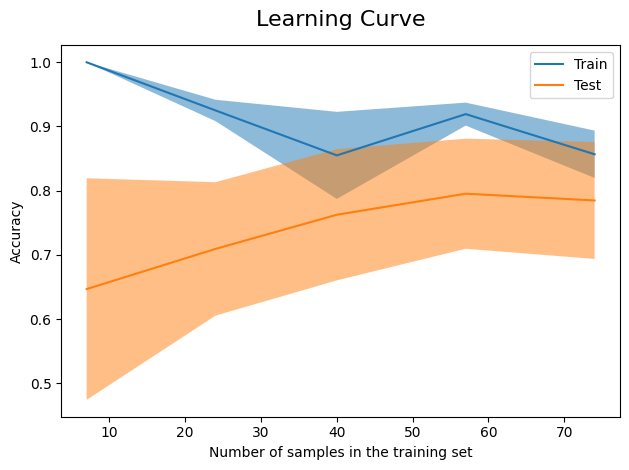

In [5]:
plot_learning_curve(
    model,
    X_val, y_val,
    scoring='accuracy',
)

### Validation curve

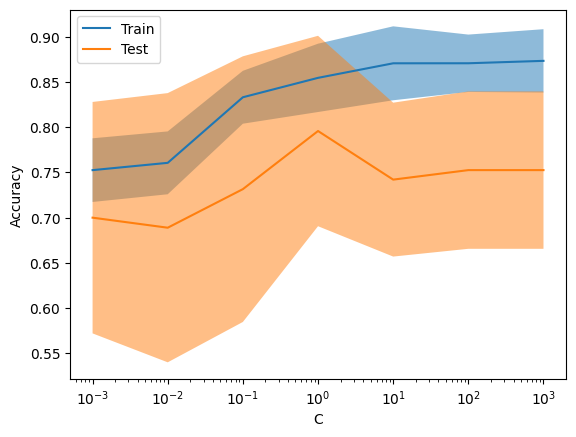

In [6]:
ValidationCurveDisplay.from_estimator(
    model,
    X_val,
    y_val,
    param_name="C",
    param_range=np.logspace(-3, 3, 7),
    scoring="accuracy",
    n_jobs=-1,
)